In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

In [105]:
# Ruta del archivo en tu computadora local
file_path = r'C:\Users\simif\OneDrive - Universidad de los andes\DESPLIEGUE DE SOLUCIONES ANALITICAS\3 SEMANA\Crime_Data_from_2020_to_Present.csv'

In [106]:
# Cargar el conjunto de datos
df = pd.read_csv(file_path)

In [107]:
print('### Primeras 5 filas del conjunto de datos ###\n')
print(df.head())

### Primeras 5 filas del conjunto de datos ###

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICL

In [108]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (982638, 28)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
DR_NO,int64,0,0.000000,0,982638,982638,817.0,249925282.0,219743659.495798,12949544.834652,190326475,200106753,200320258
Date Rptd,object,0,0.000000,0,1735,982638,NaN,NaN,NaN,NaN,03/01/2020 12:00:00 AM,02/09/2020 12:00:00 AM,11/11/2020 12:00:00 AM
DATE OCC,object,0,0.000000,0,1735,982638,NaN,NaN,NaN,NaN,03/01/2020 12:00:00 AM,02/08/2020 12:00:00 AM,11/04/2020 12:00:00 AM
TIME OCC,int64,0,0.000000,0,1439,982638,1.0,2359.0,1338.945426,651.53783,2130,1800,1700
AREA,int64,0,0.000000,0,21,982638,1.0,21.0,10.700277,6.107808,7,1,3
AREA NAME,object,0,0.000000,0,21,982638,NaN,NaN,NaN,NaN,Wilshire,Central,Southwest
Rpt Dist No,int64,0,0.000000,0,1209,982638,101.0,2199.0,1116.459887,610.893787,784,182,356
Part 1-2,int64,0,0.000000,0,2,982638,1.0,2.0,1.404253,0.490747,1,1,1
Crm Cd,int64,0,0.000000,0,140,982638,110.0,956.0,500.823555,206.21194,510,330,480
Crm Cd Desc,object,0,0.000000,0,140,982638,NaN,NaN,NaN,NaN,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,BIKE - STOLEN


In [109]:
df['Vict Sex'].unique()

array(['M', 'X', 'F', nan, 'H', '-'], dtype=object)

In [110]:
mask = (df['Vict Sex'] == '-')
df = df.loc[~mask]

In [111]:
df['Vict Descent'].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'K', 'C', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [112]:
mask = (df['Vict Descent'] == '-')
df = df.loc[~mask]

In [113]:
# Create 'date' column with only year and month.
df['date'] = pd.to_datetime(df['DATE OCC'],format='mixed')
df['date'] = df['date'].astype(str)
df['date'] = df['date'].str[:7]

In [114]:
# Put the Dataset in chronological order.
df = df.sort_values(by='date')

In [115]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,date
77699,200705163,01/24/2020 12:00:00 AM,01/19/2020 12:00:00 AM,945,7,Wilshire,758,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1100 S VICTORIA AV,NaN,34.0535,-118.3250,2020-01
62445,200504985,01/23/2020 12:00:00 AM,01/21/2020 12:00:00 AM,2300,5,Harbor,524,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,KING,ANAHEIM,33.7793,-118.2755,2020-01
62438,200704908,01/18/2020 12:00:00 AM,01/18/2020 12:00:00 AM,1230,7,Wilshire,758,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Adult Other,745.0,NaN,NaN,NaN,1200 WEST BL,NaN,34.0519,-118.3324,2020-01
62436,201004666,01/15/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1800,10,West Valley,1001,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,19300 BLYTHE ST,NaN,34.2149,-118.5596,2020-01
62434,200804817,01/18/2020 12:00:00 AM,01/08/2020 12:00:00 AM,800,8,West LA,881,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,11600 W OLYMPIC BL,NaN,34.0354,-118.4460,2020-01


In [116]:
def grab_col_names(dataframe, cat_th=10, car_th=30):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    del cat_cols[1] 
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 982636
Variables: 29
cat_cols: 7
num_cols: 13
cat_but_car: 9
num_but_cat: 2


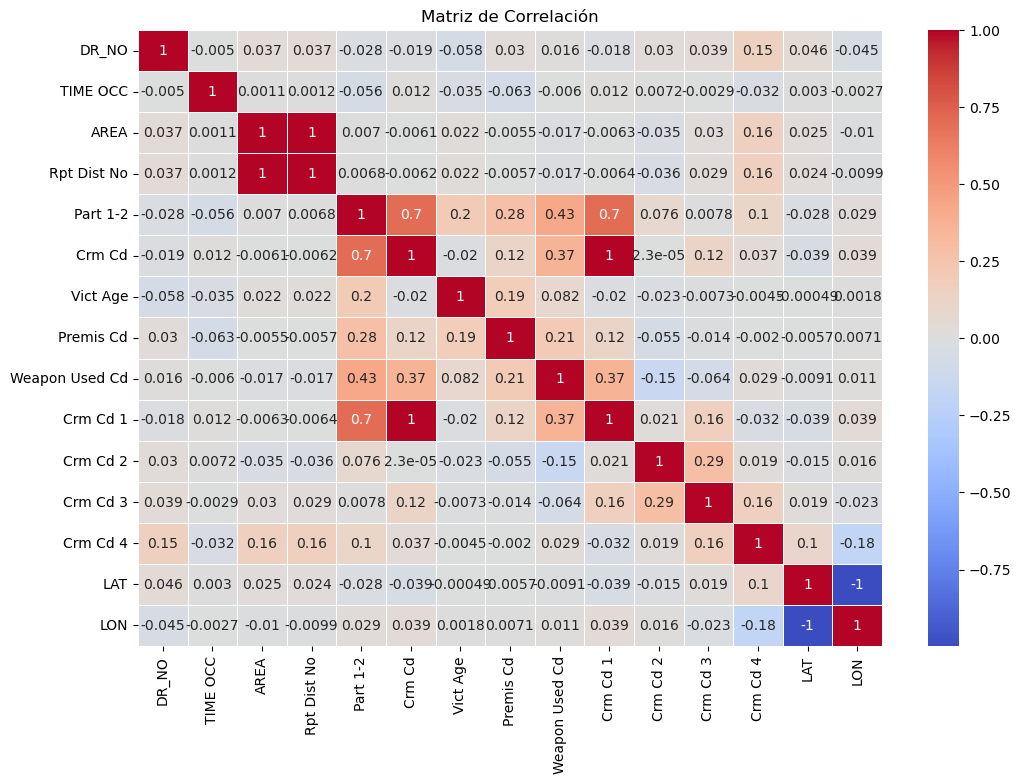

In [117]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear la matriz de correlación con las columnas numéricas
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación como un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
ojo

In [119]:
# Mostrar las primeras 5 filas para visualizar el contenido
print("### Primeras 5 filas del conjunto de datos ###\n")
print(df.head())

# Información general sobre el dataframe (tipos de datos, cantidad de valores no nulos, etc.)
print("\n### Información del Dataframe ###\n")
df.info()

# Resumen estadístico de las columnas numéricas
print("\n### Resumen Estadístico ###\n")
print(df.describe())

# Mostrar las columnas del dataframe
print("\n### Columnas del Dataframe ###\n")
print(df.columns)


### Primeras 5 filas del conjunto de datos ###

           DR_NO               Date Rptd                DATE OCC  TIME OCC  \
77699  200705163  01/24/2020 12:00:00 AM  01/19/2020 12:00:00 AM       945   
62445  200504985  01/23/2020 12:00:00 AM  01/21/2020 12:00:00 AM      2300   
62438  200704908  01/18/2020 12:00:00 AM  01/18/2020 12:00:00 AM      1230   
62436  201004666  01/15/2020 12:00:00 AM  01/14/2020 12:00:00 AM      1800   
62434  200804817  01/18/2020 12:00:00 AM  01/08/2020 12:00:00 AM       800   

       AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
77699     7     Wilshire          758         2     354   
62445     5       Harbor          524         1     210   
62438     7     Wilshire          758         2     745   
62436    10  West Valley         1001         2     740   
62434     8      West LA          881         1     310   

                                             Crm Cd Desc  ...  Status Desc  \
77699                                  THEFT OF ID


### Valores Faltantes por Columna ###

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656469
Weapon Desc       656469
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913761
Crm Cd 3          980325
Crm Cd 4          982572
LOCATION               0
Cross Street      830787
LAT                    0
LON                    0
date                   0
dtype: int64


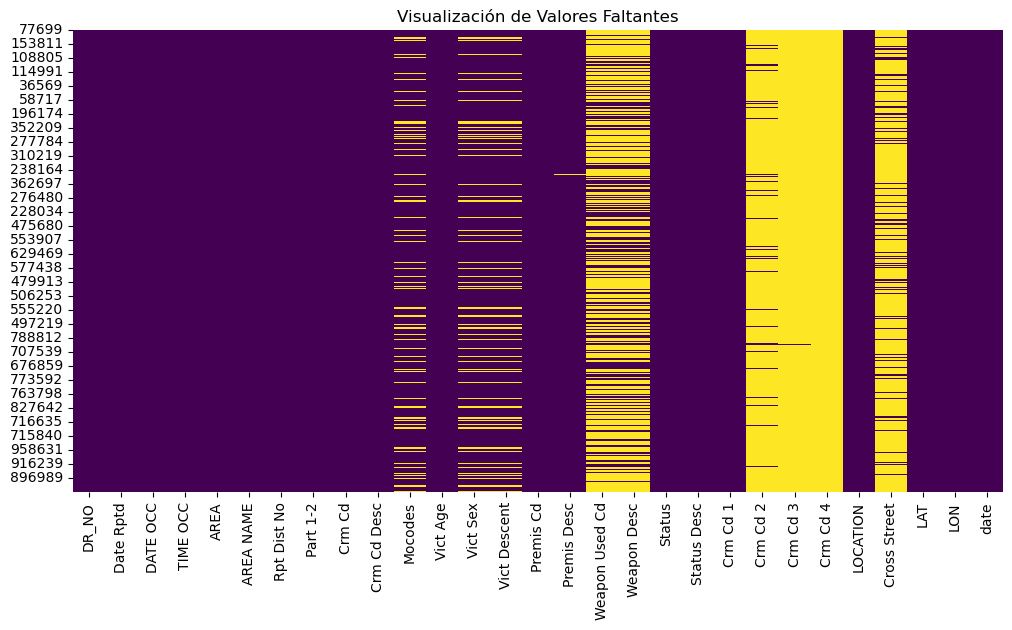

In [120]:
# Resumen de valores faltantes por columna
print("\n### Valores Faltantes por Columna ###\n")
missing_values = df.isnull().sum()
print(missing_values)

# Visualizar los valores faltantes con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualización de Valores Faltantes")
plt.show()

             AREA NAME     Ratio
AREA NAME                       
Central          67774  6.897162
77th Street      60865  6.194054
Pacific          57810  5.883155
Southwest        55978  5.696718
Hollywood        51324  5.223094
N Hollywood      49978  5.086115
Southeast        49119  4.998697
Olympic          49022  4.988826
Newton           48268  4.912094
Wilshire         47090  4.792212
Rampart          45818  4.662764
West LA          44673  4.546241
Northeast        41897  4.263736
Van Nuys         41887  4.262718
West Valley      41319  4.204914
Devonshire       40840  4.156168
Harbor           40466  4.118107
Topanga          40430  4.114443
Mission          39404  4.010030
Hollenbeck       36119  3.675725
Foothill         32555  3.313027


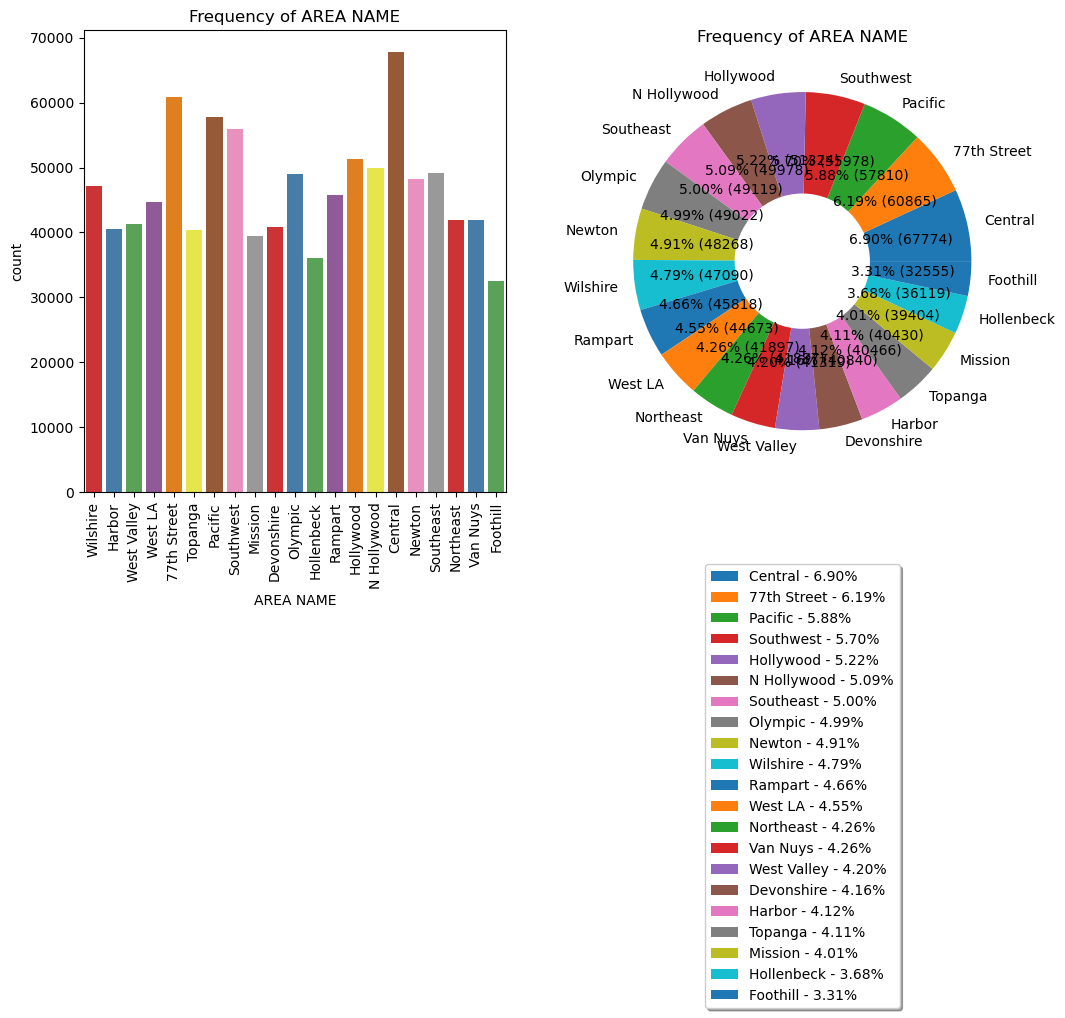

          Vict Sex      Ratio
Vict Sex                     
M           396768  40.377922
F           352750  35.898339
X            94561   9.623197
H              112   0.011398


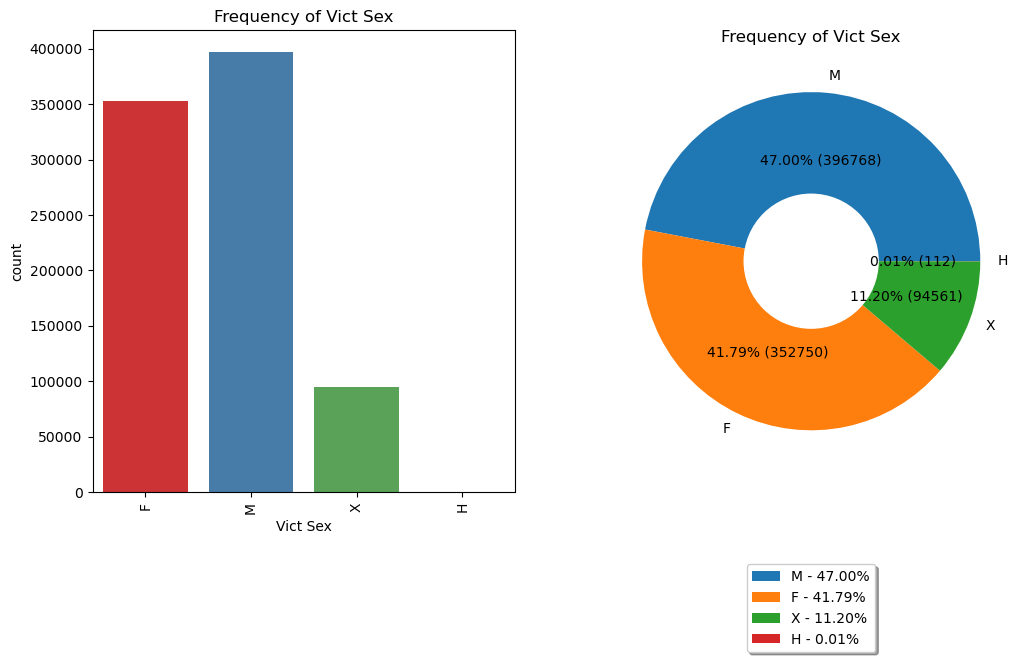

              Vict Descent      Ratio
Vict Descent                         
H                   292430  29.759748
W                   197125  20.060836
B                   134182  13.655311
X                   103330  10.515593
O                    76711   7.806655
A                    21028   2.139958
K                     5678   0.577834
F                     4555   0.463549
C                     4265   0.434037
J                     1490   0.151633
V                     1117   0.113674
I                      968   0.098511
Z                      529   0.053835
P                      277   0.028189
U                      211   0.021473
D                       86   0.008752
G                       72   0.007327
L                       71   0.007225
S                       55   0.005597


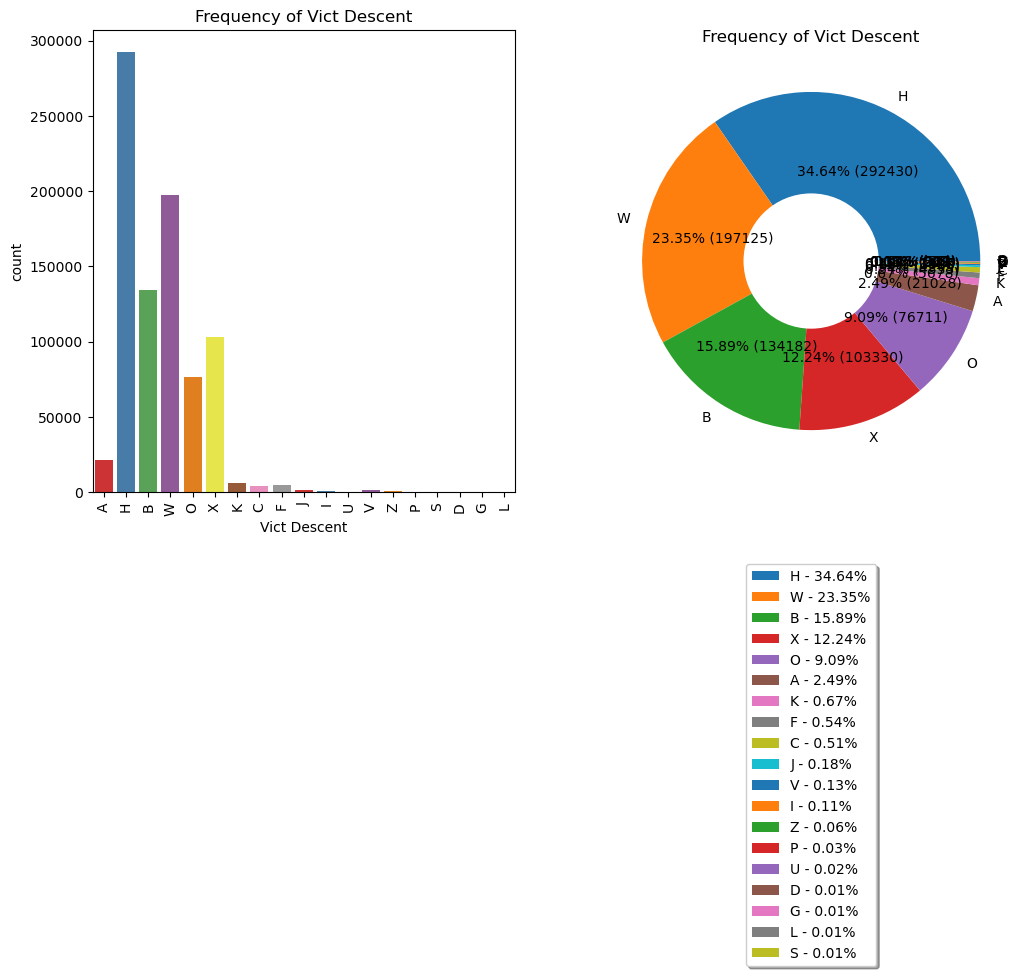

        Status      Ratio
Status                   
IC      784961  79.883192
AO      107484  10.938333
AA       85152   8.665671
JA        3199   0.325553
JO        1833   0.186539
CC           6   0.000611


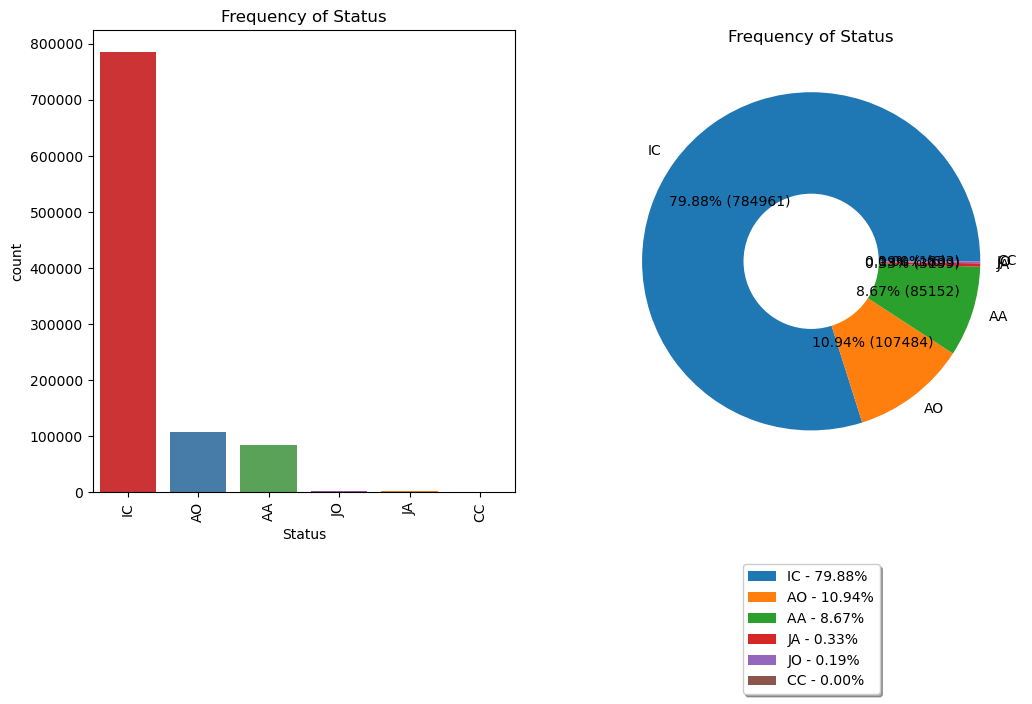

              Status Desc      Ratio
Status Desc                         
Invest Cont        784961  79.883192
Adult Other        107484  10.938333
Adult Arrest        85152   8.665671
Juv Arrest           3199   0.325553
Juv Other            1833   0.186539
UNK                     7   0.000712


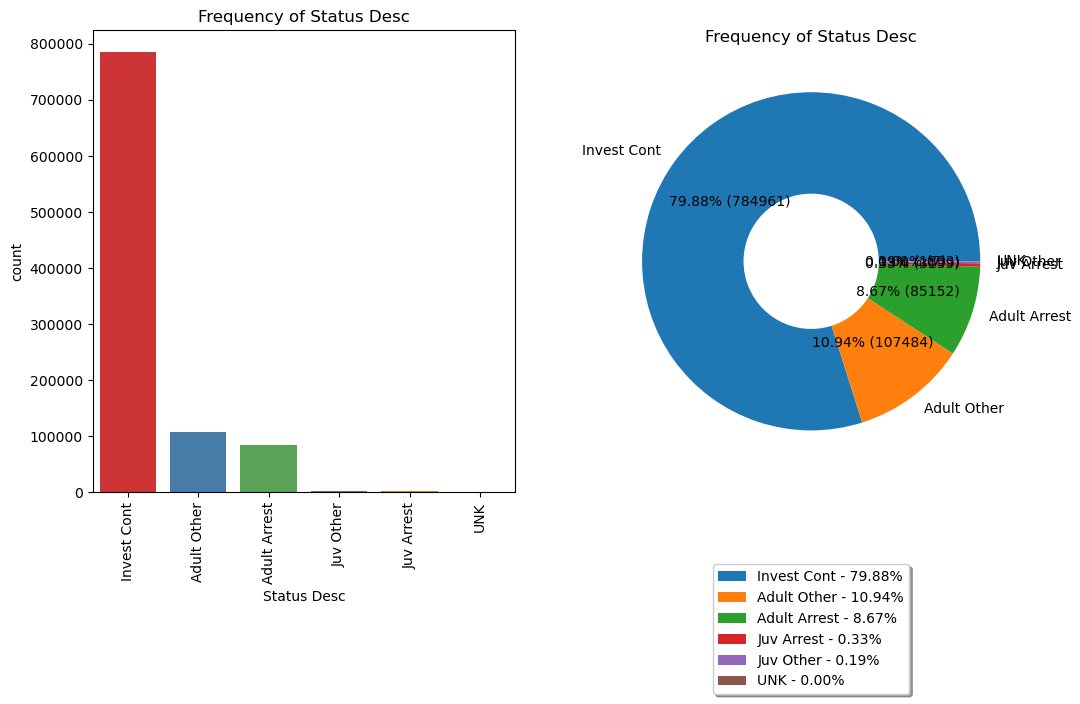

          Part 1-2      Ratio
Part 1-2                     
1           585404  59.574858
2           397232  40.425142


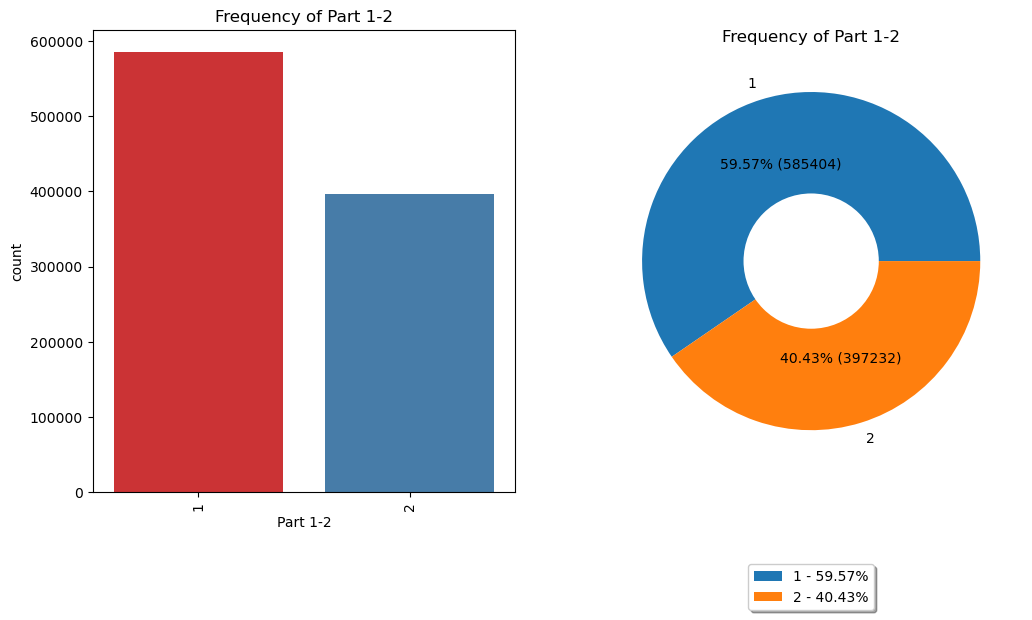

          Crm Cd 4     Ratio
Crm Cd 4                    
998.0           56  0.005699
999.0            3  0.000305
946.0            2  0.000204
821.0            1  0.000102
930.0            1  0.000102
910.0            1  0.000102


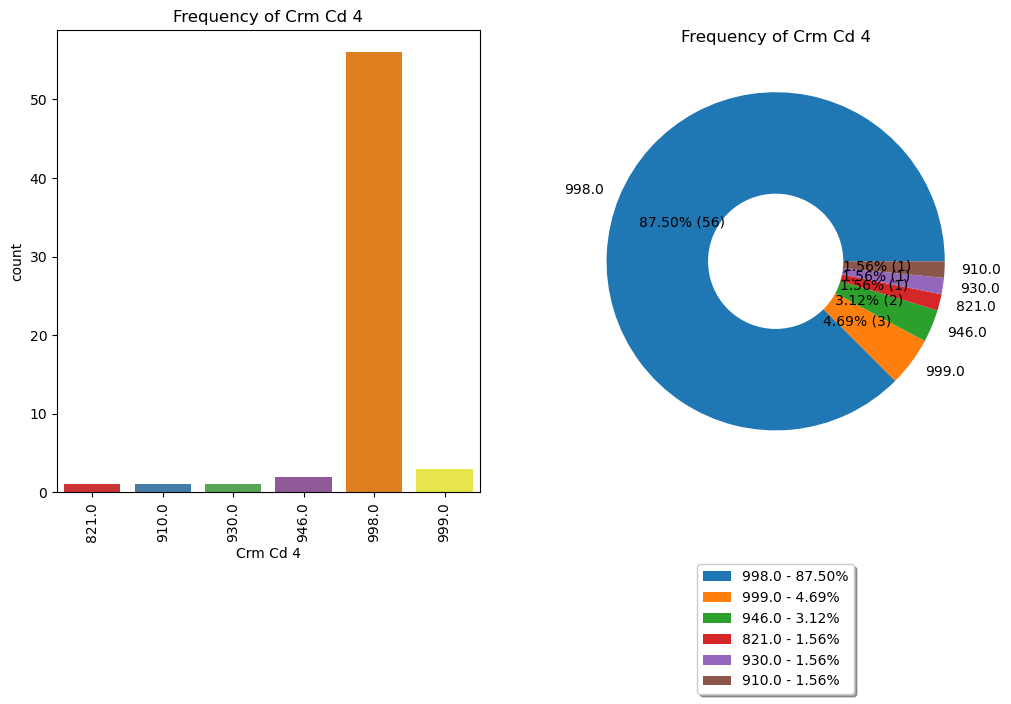

In [122]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        hole = plt.Circle((0, 0), 0.40, facecolor='white')
        plt.gcf().gca().add_artist(hole)        
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

DR_NO


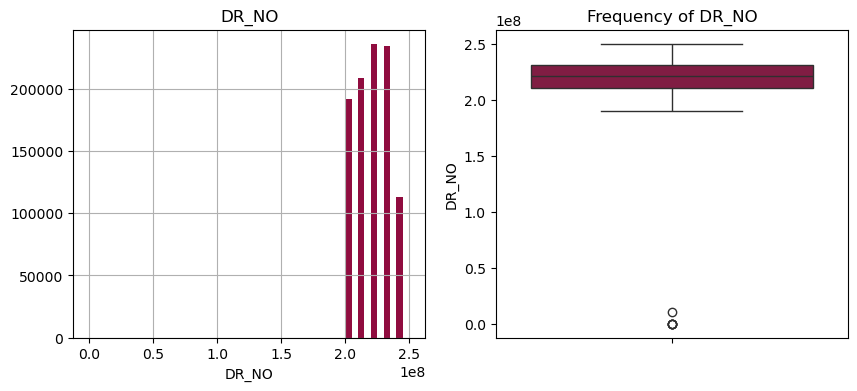

______________________________________________________

TIME OCC


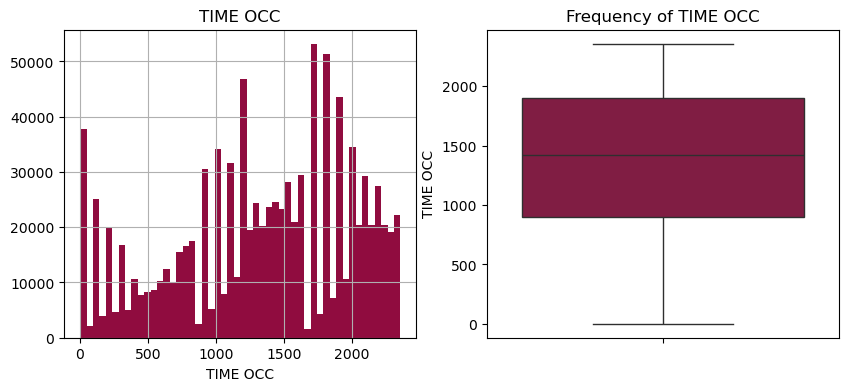

______________________________________________________

AREA


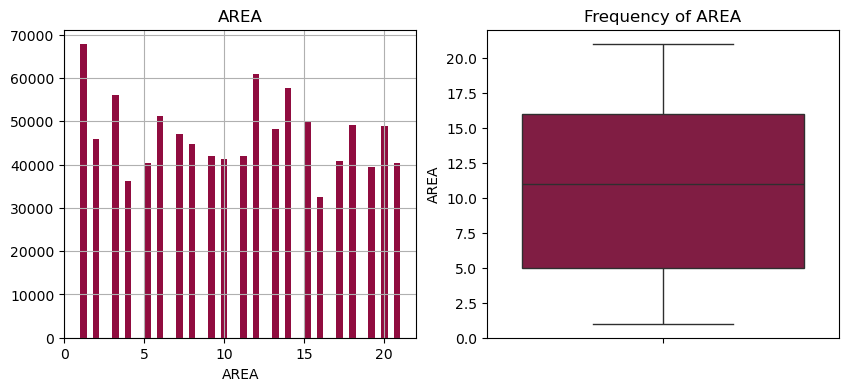

______________________________________________________

Rpt Dist No


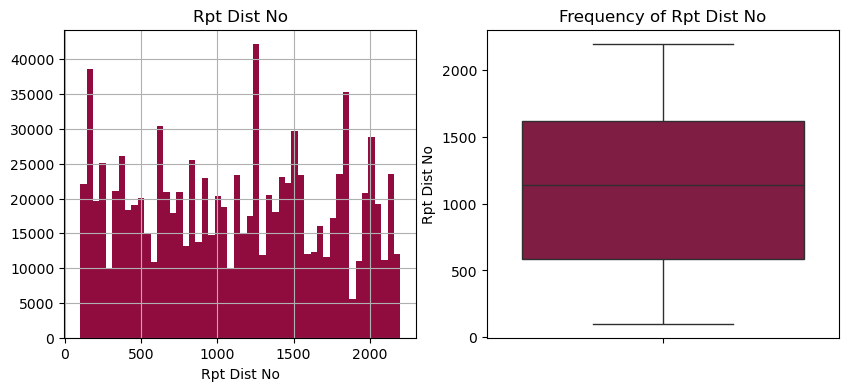

______________________________________________________

Crm Cd


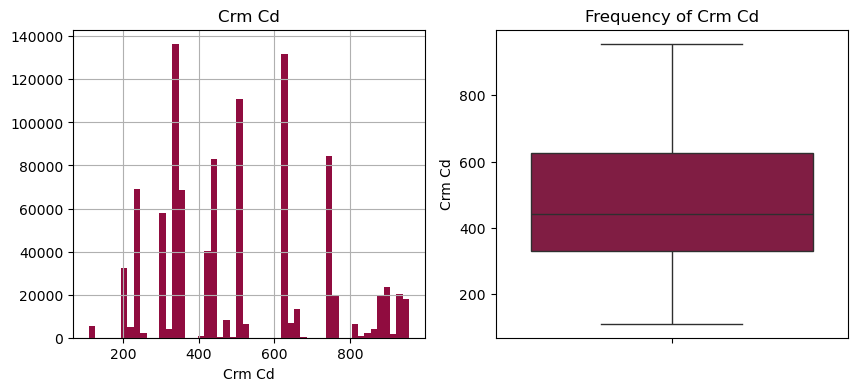

______________________________________________________

Vict Age


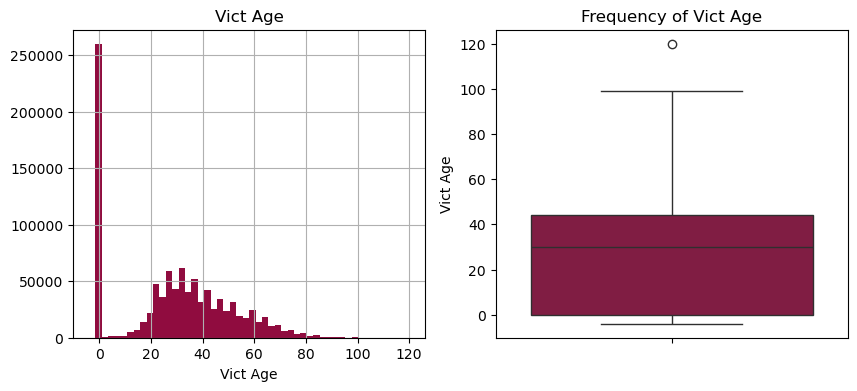

______________________________________________________

Premis Cd


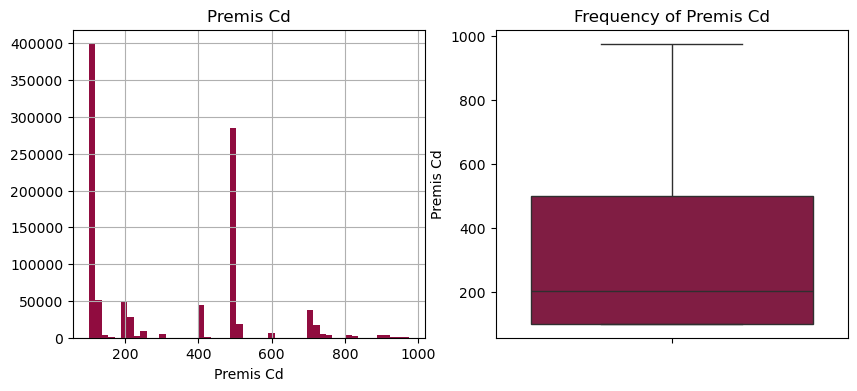

______________________________________________________

Weapon Used Cd


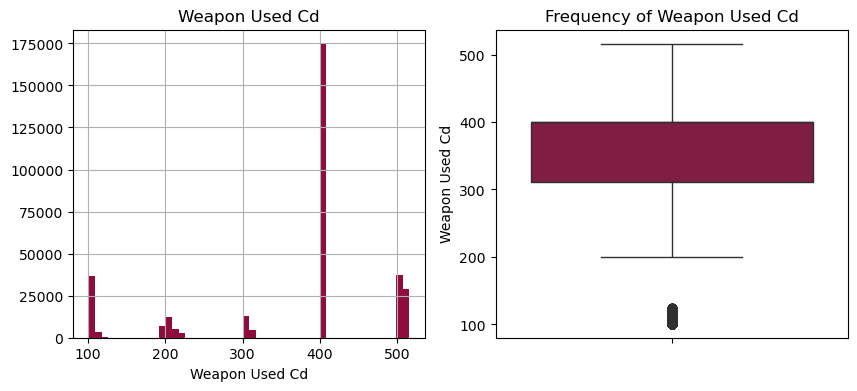

______________________________________________________

Crm Cd 1


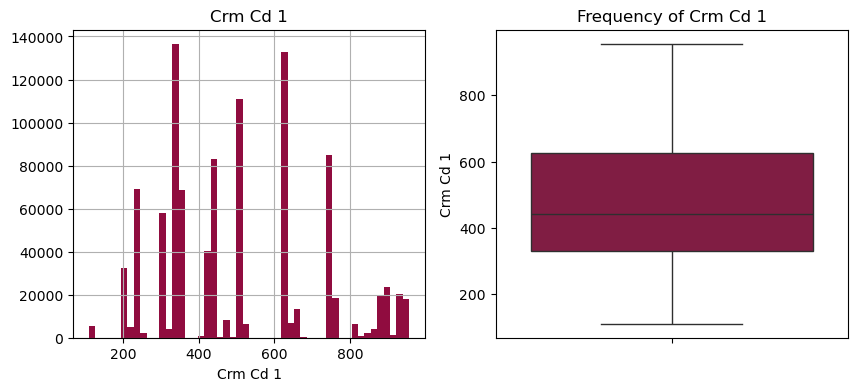

______________________________________________________

Crm Cd 2


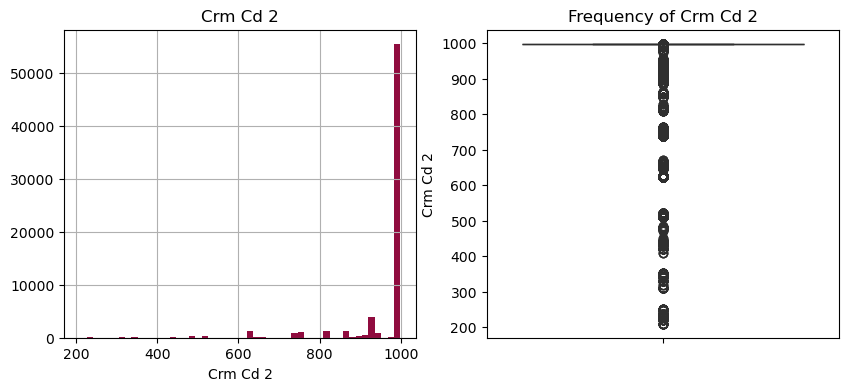

______________________________________________________

Crm Cd 3


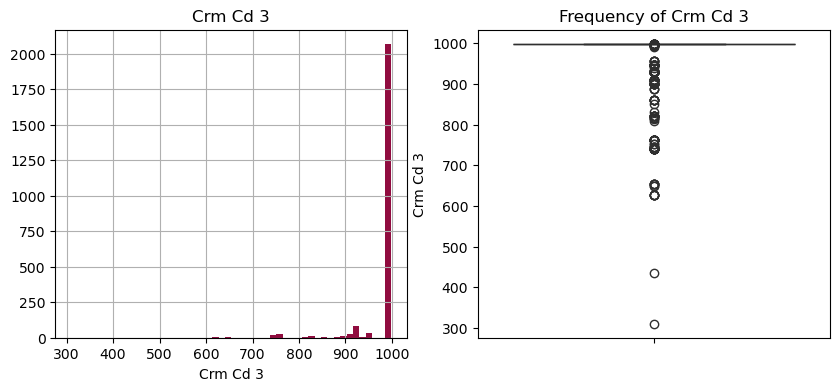

______________________________________________________

LAT


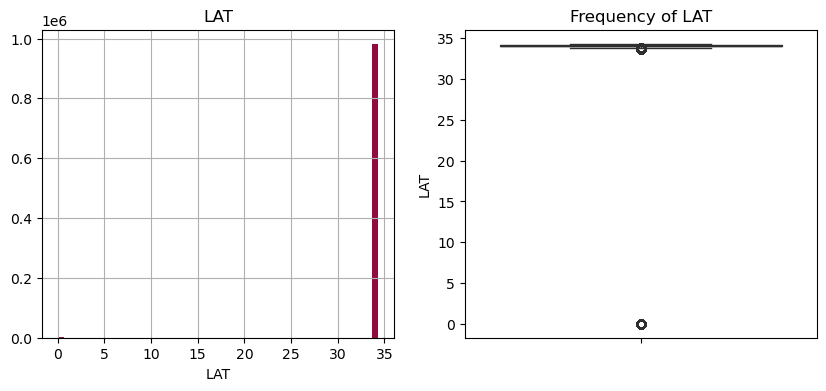

______________________________________________________

LON


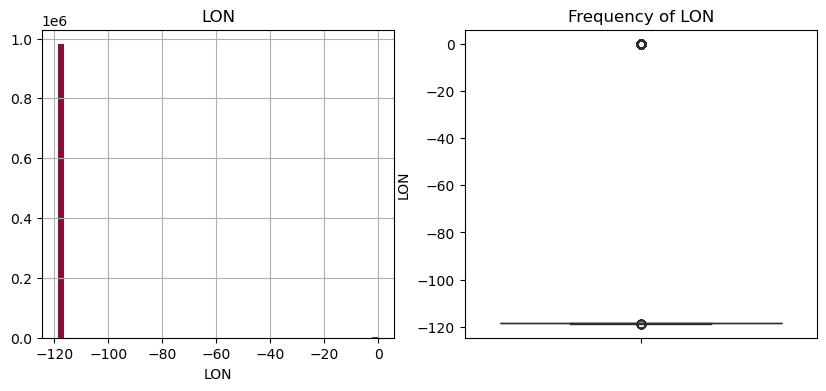

______________________________________________________



In [123]:
def num_summary(dataframe, numerical_col, plot=False):
    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50, color = "#900C3F")
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe, color = "#900C3F")
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

In [124]:
# Let's exclude victims with a negative age.
mask = (df['Vict Age'] < 0)
df_age = df.loc[~mask]

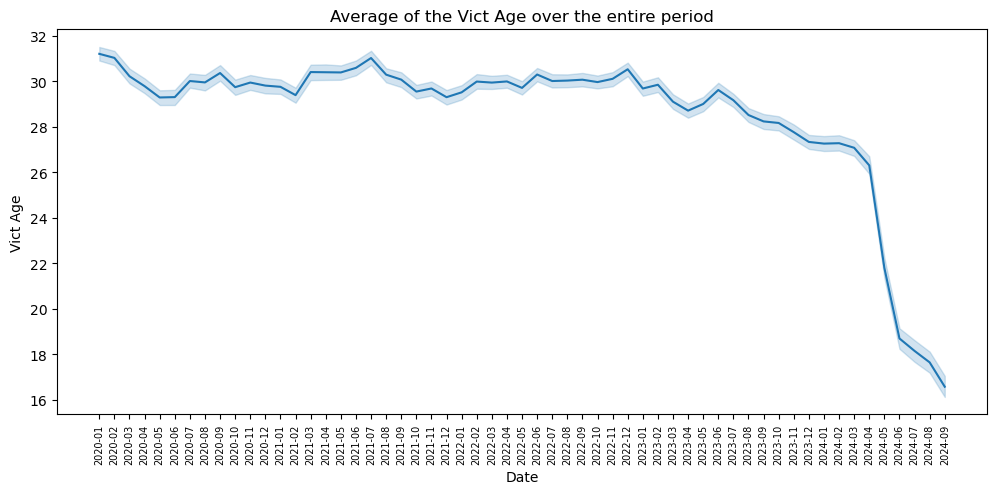

In [125]:
# Plot entire period - Average of the Vict Age
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', data=df_age)
plt.title('Average of the Vict Age over the entire period')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 7)
plt.ylabel('Vict Age')
plt.show()

In [126]:
df_age['Vict Sex'].value_counts()

Vict Sex
M    396743
F    352738
X     94467
H       112
Name: count, dtype: int64

In [127]:
# Let's delete the least relevant item.
sex = list(['H'])
df_sex = df_age.loc[~df_age['Vict Sex'].isin(sex)]

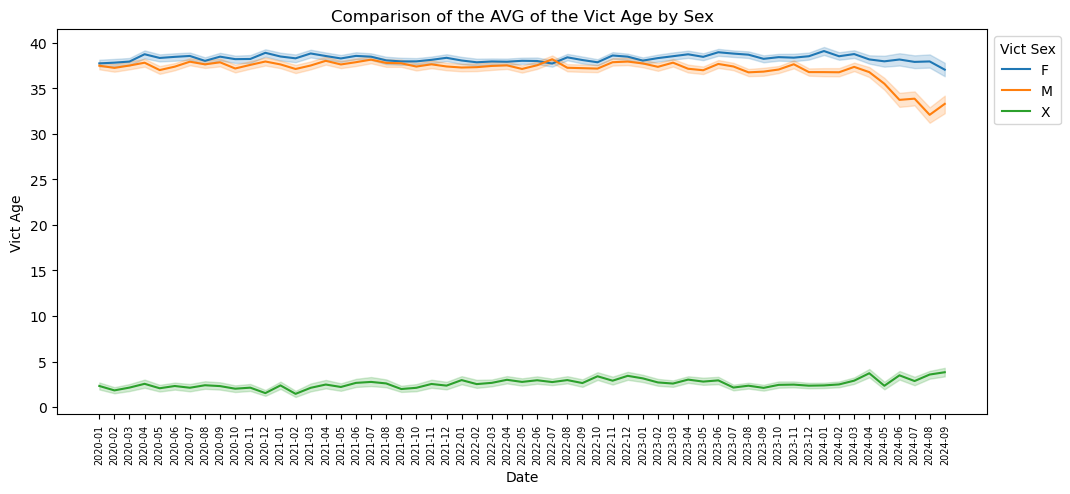

In [128]:
# Plot entire period - AVG of the Vict Age by Sex
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', hue = 'Vict Sex', data=df_sex)
plt.title('Comparison of the AVG of the Vict Age by Sex')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Vict Sex')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 7)
plt.ylabel('Vict Age')
plt.show()

In [129]:
df_age['AREA NAME'].value_counts()

AREA NAME
Central        67760
77th Street    60864
Pacific        57804
Southwest      55977
Hollywood      51318
N Hollywood    49974
Southeast      49114
Olympic        49010
Newton         48262
Wilshire       47081
Rampart        45816
West LA        44666
Northeast      41893
Van Nuys       41880
West Valley    41310
Devonshire     40827
Harbor         40466
Topanga        40425
Mission        39403
Hollenbeck     36102
Foothill       32553
Name: count, dtype: int64

In [130]:
# Let's select the most relevant items.
area = list(['Central','77th Street','Pacific','Southwest','Hollywood'])
df_area = df_age.loc[df_age['AREA NAME'].isin(area)]

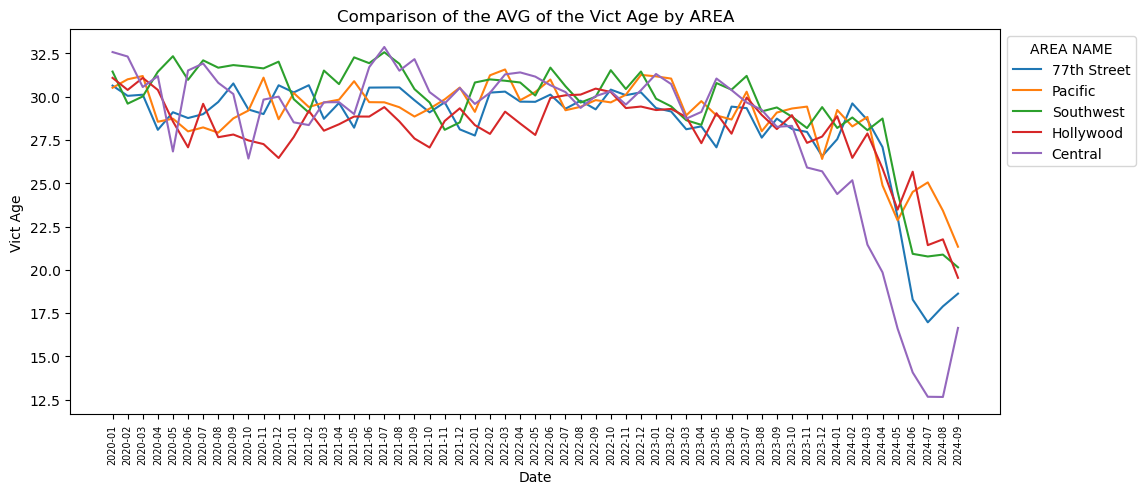

In [131]:
# Plot entire period - AREA NAME
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', hue = 'AREA NAME', data=df_area, errorbar=None)
plt.title('Comparison of the AVG of the Vict Age by AREA')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='AREA NAME')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 7)
plt.ylabel('Vict Age')
plt.show()

In [132]:
df_age['Vict Descent'].value_counts()

Vict Descent
H    292422
W    197106
B    134181
X    103234
O     76705
A     21027
K      5678
F      4555
C      4265
J      1490
V      1117
I       968
Z       529
P       277
U       211
D        86
G        72
L        71
S        55
Name: count, dtype: int64

In [133]:
# Let's select the most relevant items.
descent = list(['H','W','B','X','O'])
df_descent = df_age.loc[df_age['Vict Descent'].isin(descent)]

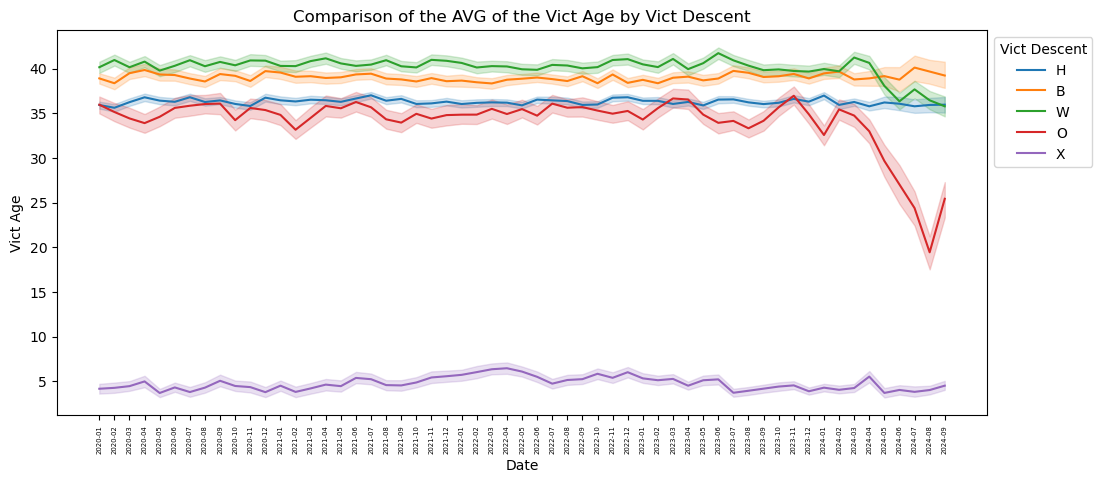

In [134]:
# Plot entire period - Vict Descent
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', hue = 'Vict Descent', data=df_descent)
plt.title('Comparison of the AVG of the Vict Age by Vict Descent')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Vict Descent')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 5)
plt.ylabel('Vict Age')
plt.show()

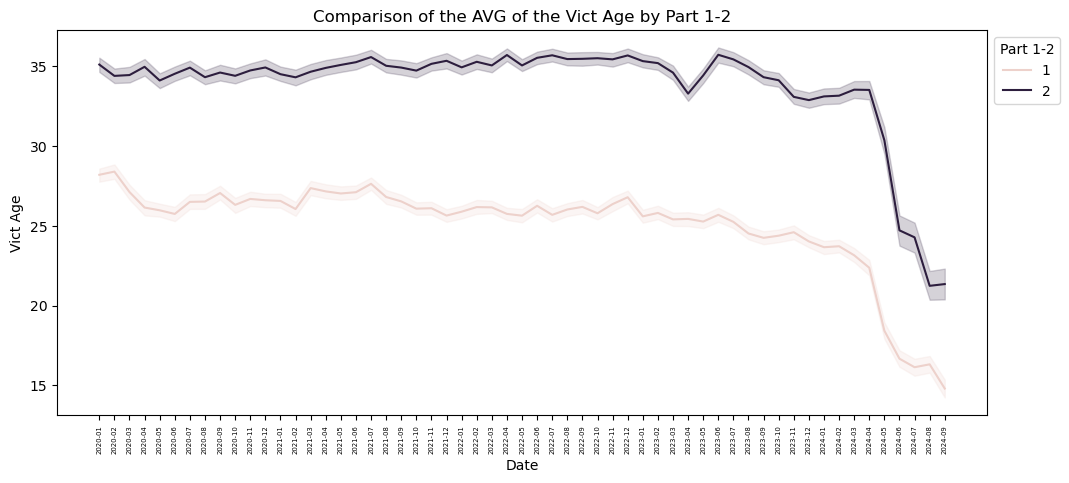

In [135]:
# Plot entire period - Part 1-2
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', hue = 'Part 1-2', data=df_age)
plt.title('Comparison of the AVG of the Vict Age by Part 1-2')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Part 1-2')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 5)
plt.ylabel('Vict Age')
plt.show()

In [136]:
# Let's select the most relevant items.
df_age['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174410
UNKNOWN WEAPON/OTHER WEAPON                        35944
VERBAL THREAT                                      23800
HAND GUN                                           20107
SEMI-AUTOMATIC PISTOL                               7246
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [137]:
weapon = list(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)','UNKNOWN WEAPON/OTHER WEAPON','VERBAL THREAT','HAND GUN'])
df_weapon = df_age.loc[df_age['Weapon Desc'].isin(weapon)]

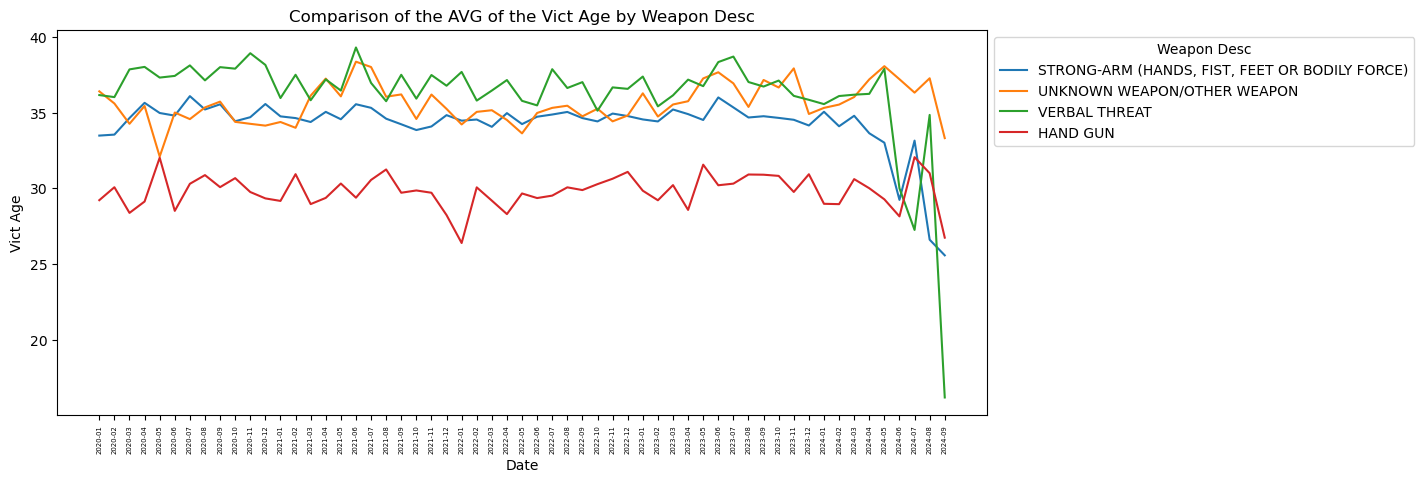

In [138]:
# Plot entire period - Weapon Desc
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='date', y = 'Vict Age', hue = 'Weapon Desc', data=df_weapon, errorbar=None)
plt.title('Comparison of the AVG of the Vict Age by Weapon Desc')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Weapon Desc')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize = 5)
plt.ylabel('Vict Age')
plt.show()

In [139]:
# Let's exclude latitude and longitude equal to zero.
mask = (df['LAT'] == 0) | (df['LON'] == 0)
df_loc = df.loc[~mask]

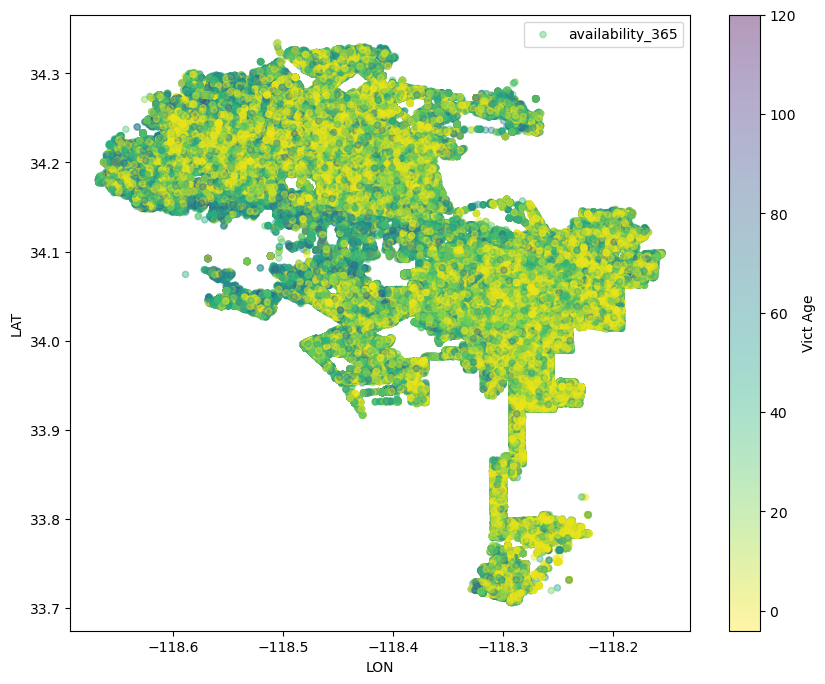

In [140]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=df_loc.plot(kind='scatter', x='LON', y='LAT', label='availability_365', c='Vict Age',
                  cmap=plt.get_cmap('viridis_r'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()
plt.show()